In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,5)
import seaborn as sns
import re
import json
import requests
import subprocess
import glob
import os
import geopandas as gpd
from geopandas import GeoDataFrame
from pygeocoder import Geocoder

In [24]:
tow = pd.read_csv('/Users/elizabethclick/Desktop/DATA205/tow_clean.csv')
tow.head()

,tow_date,tow_reason,storage_company,street,city,geo_location,longitude,latitude,location,block,hh_income,pop_total,pop_black,tract
0,2020-12-11,REPO,Final Notice,21704 Stableview Dr,Gaithersburg,POINT (-77.175624 39.211873),-77.175624,39.211873,"(39.211873, -77.175624)",7001012,208929,1931,39,700101
1,2021-02-10,REPO,Thomas,7321 Brink Rd,Gaithersburg,POINT (-77.148754 39.211605),-77.148754,39.211605,"(39.211605, -77.148754)",7001013,135208,800,10,700101
2,2020-02-15,REPO,Greenwood Recovery,21400 Laytonsville Rd,Gaithersburg,POINT (-77.141329 39.207148),-77.141329,39.207148,"(39.207148, -77.141329)",7001032,218173,1017,193,700103
3,2020-02-04,REPO,Greenwood Recovery,7571 Lindbergh Dr,Gaithersburg,POINT (-77.153158 39.166038),-77.153158,39.166038,"(39.166038, -77.153158)",7001033,172778,3112,345,700103
4,2020-02-08,NOP,Henrys,17604 Phelps Hill Ln,Derwood,POINT (-77.145388 39.147122),-77.145388,39.147122,"(39.147122, -77.145388)",7001033,172778,3112,345,700103


In [25]:
print(tow[tow["storage_company"] == "Tcl"])


         tow_date tow_reason storage_company                  street  \
12     2020-08-02        PRV             Tcl  7501 Muncaster Mill Rd   
13     2020-08-12       FIRE             Tcl    17612 Phelps Hill Ln   
15     2020-12-20       REPO             Tcl  6314 Holland Meadow Ln   
76     2020-12-03       REPO             Tcl        9214 Chadburn Pl   
77     2020-12-11       REPO             Tcl       9410 Penshurst Ct   
...           ...        ...             ...                     ...   
18632  2020-04-05        NOP             Tcl       5401 Westbard Ave   
18665  2021-01-23       REPO             Tcl      12122 Bentridge Pl   
18752  2020-08-13        NOP             Tcl       10524 Westlake Dr   
18756  2020-12-10        NOP             Tcl       10405 Westlake Dr   
18764  2021-01-23       REPO             Tcl       10518 Westlake Dr   

                     city                  geo_location  longitude   latitude  \
12           Gaithersburg  POINT (-77.153568 39.153681

In [27]:
## WHAT AREAS EXPERIENCE THE MOST TOWING
#subset cities with over 200 towings for the year
tow_city=tow['city'].value_counts()[tow['city'].value_counts()> 200]
city_count = tow["city"].value_counts()
city_freq = tow["city"].value_counts(normalize = True)
print(city_freq)
tow_city

Silver Spring         0.423616
Gaithersburg          0.162253
Germantown            0.124314
Rockville             0.106304
Montgomery Village    0.087228
Bethesda              0.028294
Burtonsville          0.016145
Takoma Park           0.014707
Damascus              0.008366
Derwood               0.007939
Olney                 0.007087
Chevy Chase           0.006128
Kensington            0.003037
Clarksburg            0.002238
Potomac               0.001545
Boyds                 0.000320
Brookeville           0.000213
Poolesville           0.000160
Cabin John            0.000053
Garrett Park          0.000053
Name: city, dtype: float64


Silver Spring         7950
Gaithersburg          3045
Germantown            2333
Rockville             1995
Montgomery Village    1637
Bethesda               531
Burtonsville           303
Takoma Park            276
Name: city, dtype: int64

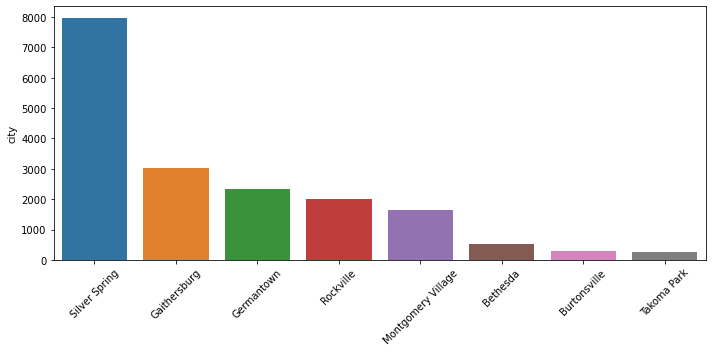

In [28]:
#visualization of towing by city: Chose top 8 to examine further
sns.barplot(x=tow_city.index, y=tow_city)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [29]:
##WHAT IS THE MOST COMMON REASON FOR TOWING?
tow_code=tow['tow_reason'].value_counts(normalize = True)[tow['tow_reason'].value_counts(normalize = True)> 0.0099]
reason_count = tow["tow_reason"].value_counts()
reason_freq = tow["tow_reason"].value_counts(normalize = True)
print(reason_freq)
tow_code


NOP                            0.512868
PKG                            0.199766
PRV                            0.088080
REPO                           0.071828
FIRE                           0.055150
                                 ...   
PARKED IN RESERVE              0.000053
INOP                           0.000053
PARKED IN COMMERCIAL AREA      0.000053
ARKED IN HANDICAPPED  W NOP    0.000053
TAKING TWO SPACES              0.000053
Name: tow_reason, Length: 212, dtype: float64


NOP     0.512868
PKG     0.199766
PRV     0.088080
REPO    0.071828
FIRE    0.055150
EXP     0.029467
Name: tow_reason, dtype: float64

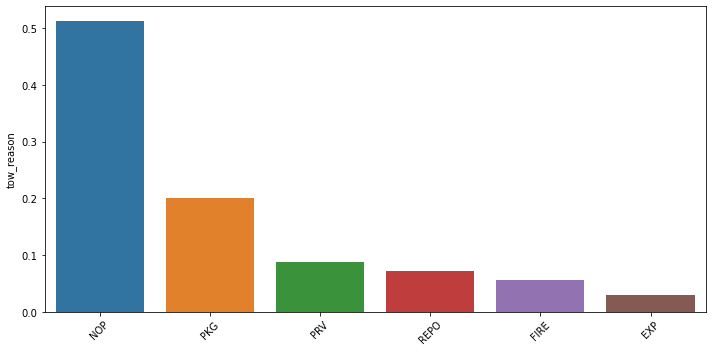

In [30]:
#visualization of towing by reason
sns.barplot(x=tow_code.index, y=tow_code)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [33]:
##WHICH COMPANIES ARE TOWING AND ARE THERE DISCREPANCIES?
tow_company=tow['storage_company'].value_counts(normalize = True)[tow['storage_company'].value_counts(normalize = True)> 0.05]
company_count = tow["storage_company"].value_counts()
company_freq = tow["storage_company"].value_counts(normalize = True)
print(company_freq)
tow_company

Henrys                          0.325039
Authorized                      0.161667
Prestige                        0.086961
Speedy                          0.052592
Tcl                             0.044653
                                  ...   
Kensington Finance              0.000053
Flowmax Towing And Transport    0.000053
Fitzgerald                      0.000053
Avs                             0.000053
Customes                        0.000053
Name: storage_company, Length: 258, dtype: float64


Henrys        0.325039
Authorized    0.161667
Prestige      0.086961
Speedy        0.052592
Name: storage_company, dtype: float64

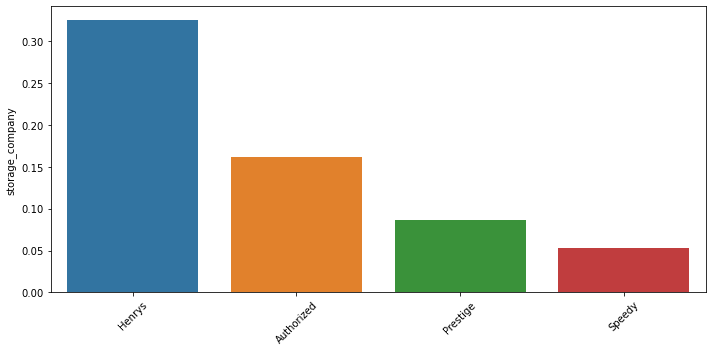

In [34]:
#Visualization of towing by company
sns.barplot(x=tow_company.index, y=tow_company)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [35]:
#838 companies still listed as Tcl could not be identified
print(tow[tow["storage_company"] == "Tcl"])

         tow_date tow_reason storage_company                  street  \
12     2020-08-02        PRV             Tcl  7501 Muncaster Mill Rd   
13     2020-08-12       FIRE             Tcl    17612 Phelps Hill Ln   
15     2020-12-20       REPO             Tcl  6314 Holland Meadow Ln   
76     2020-12-03       REPO             Tcl        9214 Chadburn Pl   
77     2020-12-11       REPO             Tcl       9410 Penshurst Ct   
...           ...        ...             ...                     ...   
18632  2020-04-05        NOP             Tcl       5401 Westbard Ave   
18665  2021-01-23       REPO             Tcl      12122 Bentridge Pl   
18752  2020-08-13        NOP             Tcl       10524 Westlake Dr   
18756  2020-12-10        NOP             Tcl       10405 Westlake Dr   
18764  2021-01-23       REPO             Tcl       10518 Westlake Dr   

                     city                  geo_location  longitude   latitude  \
12           Gaithersburg  POINT (-77.153568 39.153681

In [74]:
#top volume towing companies
ct = tow.groupby("city")
ct.first()
sc = tow.groupby("storage_company")
sc.first()
ct.size()

city
Bethesda               531
Boyds                    6
Brookeville              4
Burtonsville           303
Cabin John               1
Chevy Chase            115
Clarksburg              42
Damascus               157
Derwood                149
Gaithersburg          3045
Garrett Park             1
Germantown            2333
Kensington              57
Montgomery Village    1637
Olney                  133
Poolesville              3
Potomac                 29
Rockville             1995
Silver Spring         7950
Takoma Park            276
dtype: int64

In [79]:
ct_sc = tow.groupby(["city", "storage_company"])
ct_sc.size()


city         storage_company
Bethesda     Aau                 3
             Aubrun              1
             Auburn             30
             Auburn Towing      17
             Authorized         14
                                ..
Takoma Park  Ricky               1
             Rickys             12
             Tcl                13
             Thomas              3
             Vrs                 1
Length: 730, dtype: int64

In [80]:
#Group by city, a column, then get group Gaithersburg, a column value
df_city = tow.groupby("city")
df_city.first()
df_city.get_group("Gaithersburg")

,tow_date,tow_reason,storage_company,street,geo_location,longitude,latitude,location,block,hh_income,pop_total,pop_black,tract
0,2020-12-11,REPO,Final Notice,21704 Stableview Dr,POINT (-77.175624 39.211873),-77.175624,39.211873,"(39.211873, -77.175624)",7001012,208929,1931,39,700101
1,2021-02-10,REPO,Thomas,7321 Brink Rd,POINT (-77.148754 39.211605),-77.148754,39.211605,"(39.211605, -77.148754)",7001013,135208,800,10,700101
2,2020-02-15,REPO,Greenwood Recovery,21400 Laytonsville Rd,POINT (-77.141329 39.207148),-77.141329,39.207148,"(39.207148, -77.141329)",7001032,218173,1017,193,700103
3,2020-02-04,REPO,Greenwood Recovery,7571 Lindbergh Dr,POINT (-77.153158 39.166038),-77.153158,39.166038,"(39.166038, -77.153158)",7001033,172778,3112,345,700103
6,2020-06-16,ABN,Vrs,7411 Lindbergh Dr,POINT (-77.155582 39.163818),-77.155582,39.163818,"(39.163818, -77.155582)",7001033,172778,3112,345,700103
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7493,2020-08-19,NOP,Henrys,19134 Clover Meadow Pl,POINT (-77.232069 39.170223),-77.232069,39.170223,"(39.170223, -77.232069)",7008331,141597,1678,381,700833
7494,2020-12-11,REPO,Tcl,11207 White Barn Ct,POINT (-77.231286 39.170776),-77.231286,39.170776,"(39.170776, -77.231286)",7008331,141597,1678,381,700833
7496,2021-01-01,FIRE,Henrys,11210 White Barn Ct,POINT (-77.231475 39.170742),-77.231475,39.170742,"(39.170742, -77.231475)",7008331,141597,1678,381,700833
7497,2021-01-20,REPO,Thomas,11141 Black Forest Way,POINT (-77.230689 39.170265),-77.230689,39.170265,"(39.170265, -77.230689)",7008331,141597,1678,381,700833


In [81]:
#top 8 cities
city_set = set(tow_city.index)
city_set

{'Bethesda',
 'Burtonsville',
 'Gaithersburg',
 'Germantown',
 'Montgomery Village',
 'Rockville',
 'Silver Spring',
 'Takoma Park'}

In [82]:
#top tow reasons
reason_set = set(tow_code.index)
reason_set

{'EXP', 'FIRE', 'NOP', 'PKG', 'PRV', 'REPO'}

In [83]:
#top volume towing companies
company_set = set(tow_company.index)
company_set

{'Authorized', 'Henrys', 'Prestige', 'Speedy'}

In [ ]:
#Look at where individual companies are towing

while x < rowcount :
    x = -1
    rowcount = len(tow)-1
for name in city_set :
    word_set = set(top_names)

while x < rowcount :
    x = x+1
    if tow.iloc[x,4] in city_set :
        string_to_be_searched = str(towing.iloc[x,3])
        for w in string_to_be_searched.split():
            if w in word_set :
                towing.iloc[x,2] = w
                print("%s in string" % w)    
            else :
                print("not found ", w)
    else :
        print(x, "is ok")
        
towing.head(50)
print(tow["storage_company" =="Tcl"], tow["notes"])
